In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csgraph
import networkx as nx
from sklearn.metrics import confusion_matrix

Parte A: PCA 

In [37]:
iris = datasets.load_iris()
X_scaled = StandardScaler().fit_transform(iris.data)
features = X_scaled.T
cov_matrix = np.cov(features)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues.sort()
eigenvalues = eigenvalues[::-1]

projected_1 = X_scaled.dot(eigenvectors.T[0])
projected_2 = X_scaled.dot(eigenvectors.T[1])
res = pd.DataFrame(projected_1, columns=["PC1"])
res["PC2"] = projected_2
res["Target"] = iris.target
#res.head()

#plt.figure(figsize=(20, 10))
#sns.scatterplot(projected_1, projected_2, hue=res["Target"], s=100)
#plt.scatter(projected_1,projected_2)
#plt.show()

Parte B

In [43]:
def dist(x,y):
    m = []
    for i in range(len(x)):
        k = []
        for j in range(len(y)):
            k.append(1/(x[i]-y[j]+0.00000001))
        m.append(k)
    return m
distances = dist(projected_1,projected_2) #distance matrix

matriz_d = []
for i in range(len(distances)):
    matriz_k = []
    for j in range(len(distances)):
        if i != j:
            matriz_k.append(0)
        if i == j:
            matriz_k.append(distances[i][j])
            
    matriz_d.append(matriz_k)
laplacian = np.subtract(distances,matriz_d)      

eigenvalues_la, eigenvectors_laplacian = np.linalg.eig(laplacian)
eigenvalues_laplacian, eigenvectors_laplacian = np.linalg.eig(laplacian)
eigenvalues_la.sort()
eigenvectors_laplacian.sort()

associeted_eigenvalue = eigenvalues_la[1] #second smallest eigenvalue, Fiedler vector
associeted_eigenvector  = eigenvectors_laplacian[1]
#for i in range(len(eigenvalues_la)):
#    if eigenvalues_laplacian[i] == associeted_eigenvalue:
#        index_fiedler = i

#associeted_eigenvector = eigenvectors_laplacian[index_fiedler]


Aplicando o método de Newman mais uma vez:

In [82]:
signals = []
for i in range(len(associeted_eigenvector)):
    if associeted_eigenvector[i] > 0:
        signals.append(1)
    else:
        signals.append(0)

comunidade_1x = []
comunidade_1y = []
comunidade_2x = []
comunidade_2y = []

for i in range(len(signals)):
    if signals[i] == 0:
        comunidade_1x.append(projected_1[i])
        comunidade_1y.append(projected_2[i])
    if signals[i] == 1:
        comunidade_2x.append(projected_1[i])
        comunidade_2y.append(projected_2[i])
        

distances_2 = dist(comunidade_1x,comunidade_1y)

matriz_d_2 = []
for i in range(len(distances_2)):
    matriz_k_2 = []
    for j in range(len(distances_2)):
        if i != j:
            matriz_k_2.append(0)
        if i == j:
            matriz_k_2.append(distances_2[i][j])
            
    matriz_d_2.append(matriz_k_2)
    
laplacian_2 = np.subtract(distances_2,matriz_d_2)      

eigenvalues_laplacian_2, eigenvectors_laplacian_2 = np.linalg.eig(laplacian_2)
eigenvalues_laplacian_2.sort()
eigenvectors_laplacian_2.sort()

associeted_eigenvalue_2 = eigenvalues_laplacian_2[1] #second smallest eigenvalue, Fiedler vector
associeted_eigenvector_2  = eigenvectors_laplacian_2[1]

In [83]:
signals = []
for i in range(len(associeted_eigenvector)):
    if associeted_eigenvector[i] > 0:
        signals.append(0)

for i in range(len(associeted_eigenvector_2)):
    if associeted_eigenvector_2[i] > 0:
        signals.append(1)
    else:
        signals.append(2)

signals.sort()


comunidade_1x = []
comunidade_1y = []
comunidade_2x = []
comunidade_2y = []
comunidade_3x = []
comunidade_3y = []

for i in range(len(signals)):
    if signals[i] == 0:
        comunidade_1x.append(projected_1[i])
        comunidade_1y.append(projected_2[i])
    if signals[i] == 1:
        comunidade_2x.append(projected_1[i])
        comunidade_2y.append(projected_2[i])
    if signals[i] == 2:
        comunidade_3x.append(projected_1[i])
        comunidade_3y.append(projected_2[i])

print(len(signals))



150


Matriz de confusão

In [85]:
print(confusion_matrix(signals,iris.target))

[[50 16  0]
 [ 0 34  3]
 [ 0  0 47]]


Tentar criar os clusters:

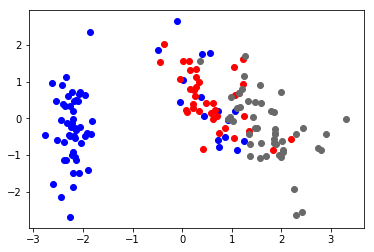

In [86]:
plt.scatter(comunidade_1x,comunidade_1y, color = 'blue')
plt.scatter(comunidade_2x,comunidade_2y, color = 'red')
plt.scatter(comunidade_3x,comunidade_3y, color = 'dimgrey')
plt.show()

/home/ricardo/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


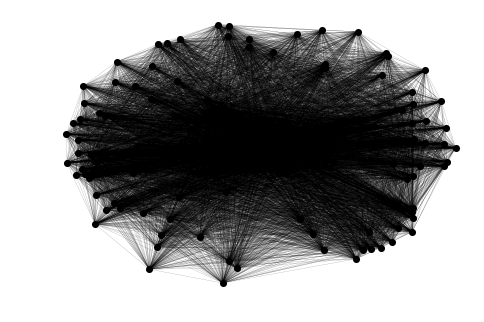

In [87]:
A = np.array(laplacian)
G = nx.from_numpy_matrix(A)

options = {
    'node_color': 'black',
    'node_size': 50,
    'line_color': 'dimgrey',
    'linewidths': 0,
    'width': 0.1,
}
nx.draw(G, **options)
plt.show()